In [3]:
#import torch
import pandas as pd

In [5]:
torch.rand(3)

tensor([0.7184, 0.7508, 0.3859])

In [6]:
!nvidia-smi

Sun Jul  9 09:20:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.182.03   Driver Version: 470.182.03   CUDA Version: 12.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:B3:00.0 Off |                    0 |
| N/A   37C    P0    42W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
df_vocab = pd.read_pickle("./data/microtext_vocabulary.pickle")
#df_vocab = df_vocab.replace('\\n',' ', regex=True)
#df_vocab = df_vocab.replace('\n',' ', regex=True)
df_vocab.head(5)

,key_,value
0,nodeset6363-119945,unless the promised effect and its medical ben...
1,nodeset6363-119944,Health insurance companies should not cover tr...
2,nodeset6363-119946,Yet this very proof is lacking in most cases.
4,nodeset6363-119947,Patients do often report relief of their compl...
6,nodeset6364-119953,Of course there are a number of programmes in ...


In [2]:
df_ref = pd.read_pickle("./data/microtext_references.pickle")
df_ref.head(5)

,label,premise,claim,mode,key_premise,key_claim
0,Attack,unless the promised effect and its medical ben...,Health insurance companies should not cover tr...,test,nodeset6363-119945,nodeset6363-119944
1,Attack,Yet this very proof is lacking in most cases.,unless the promised effect and its medical ben...,test,nodeset6363-119946,nodeset6363-119945
2,Attack,Patients do often report relief of their compl...,Health insurance companies should not cover tr...,test,nodeset6363-119947,nodeset6363-119944
3,Attack,Of course there are a number of programmes in ...,"Nevertheless, everybody should contribute to t...",test,nodeset6364-119953,nodeset6364-119955
4,Attack,"and others, such as “Musikantenstadl” and soap...","Nevertheless, everybody should contribute to t...",test,nodeset6364-119954,nodeset6364-119955


In [3]:
df_ref['label'].unique()

array(['Attack', 'Support', 'Support: Example'], dtype=object)

In [6]:
df_ref['mode'].value_counts()

mode
train       298
test         49
validate     47
Name: count, dtype: int64

In [13]:
df_ref_art = pd.read_pickle("./data/microtext_references_with_articles.pickle")
df_ref_art.head(5)

,label,premise,claim,mode,key_premise,key_claim,premise_article,claim_article
0,Attack,unless the promised effect and its medical ben...,Health insurance companies should not cover tr...,test,nodeset6363-119945,nodeset6363-119944,It is the first time in the history of medicin...,The British Medical Association (BMA) said it ...
1,Attack,Yet this very proof is lacking in most cases.,unless the promised effect and its medical ben...,test,nodeset6363-119946,nodeset6363-119945,It is a claim that has been made by the govern...,It is the first time in the history of medicin...
2,Attack,Patients do often report relief of their compl...,Health insurance companies should not cover tr...,test,nodeset6363-119947,nodeset6363-119944,"A survey of more than 1,000 people by the Roya...",The British Medical Association (BMA) said it ...
3,Attack,Of course there are a number of programmes in ...,"Nevertheless, everybody should contribute to t...",test,nodeset6364-119953,nodeset6364-119955,"The BBC has a licence fee of Â£1.5m a year, wh...","The BBC, ITV, Channel 4, Channel 5, the BBC Ne..."
4,Attack,"and others, such as “Musikantenstadl” and soap...","Nevertheless, everybody should contribute to t...",test,nodeset6364-119954,nodeset6364-119955,It is not the first time this has happened. In...,"The BBC, ITV, Channel 4, Channel 5, the BBC Ne..."


In [18]:
df_ref_art['premise_article'].iloc[0]

'It is the first time in the history of medicine that a drug has been given the go-ahead to be used in the UK. But it is not yet clear whether it will be legal to use it in the NHS. The UK government says it will decide in the next few months whether to allow it. It is not clear whether there is enough evidence to justify the use of the drug. In the past, it has been used to treat conditions such as diabetes, heart disease and cancer, but it has not been used as a treatment for mental health problems. There is no evidence that it is effective in treating mental health conditions. However, there is a growing body of evidence to suggest that it can be used to help people with mental health issues. A report by the Royal College of Psychiatrists (RCPS) concluded that there was no evidence to support its use in the treatment of mental health disorders. Its report said: "There is insufficient evidence to say that the drug is effective at treating mental illness. "However, it is possible that

In [19]:
df_ref_art['premise'].iloc[0]

'unless the promised effect and its medical benefit have been concretely proven.'

In [20]:
df_ref_art['claim'].iloc[0]

'Health insurance companies should not cover treatment in complementary medicine'

In [4]:
df_kialo = pd.read_pickle("./data/kialo_references.pickle")
df_kialo.head(5)

,label,premise,claim,mode,key_premise,key_claim
0,Attack,The equity and bond market plays an extremely ...,"A flat ""Asset Tax"" is all the tax we should ev...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
1,Attack,"An ""Asset Tax"" is inflexible to the changing c...","A flat ""Asset Tax"" is all the tax we should ev...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
2,Support,"Someone who inherits an asset, e.g. a house, m...","An ""Asset Tax"" is inflexible to the changing c...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
3,Attack,"Regardless of the source, percentage, or utili...","A flat ""Asset Tax"" is all the tax we should ev...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
4,Support,An asset tax is the most fair system of taxing...,"A flat ""Asset Tax"" is all the tax we should ev...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."


In [12]:
df_kialo_test = df_kialo[df_kialo['mode']== 'test'][['label', 'premise', 'claim']]

In [19]:
df_kialo_test[df_kialo_test['label'] != 'Rephrase']

,label,premise,claim
0,Attack,The equity and bond market plays an extremely ...,"A flat ""Asset Tax"" is all the tax we should ev..."
1,Attack,"An ""Asset Tax"" is inflexible to the changing c...","A flat ""Asset Tax"" is all the tax we should ev..."
2,Support,"Someone who inherits an asset, e.g. a house, m...","An ""Asset Tax"" is inflexible to the changing c..."
3,Attack,"Regardless of the source, percentage, or utili...","A flat ""Asset Tax"" is all the tax we should ev..."
4,Support,An asset tax is the most fair system of taxing...,"A flat ""Asset Tax"" is all the tax we should ev..."
...,...,...,...
26800,Support,Sony has reams of fantastic camera technology.,Sony would be a good acquisition for Apple.
26801,Support,Sony entered the market after digital camera b...,Sony has reams of fantastic camera technology.
26802,Support,Camera technology is hugely important to Apple...,Sony has reams of fantastic camera technology.
26803,Support,Steve Jobs had an incredibly special respect f...,Sony would be a good acquisition for Apple.


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df'
df = pd.DataFrame({'column1': [1, 2, 3, 4, 5],
                   'mode': ['test', 'train', 'test', 'train', 'test'],
                   'label': ['Label1', 'Label2', 'Label3', 'Rephrase', 'Label4']})

# Select rows where 'mode' column is equal to 'test' and 'label' column is not equal to 'Rephrase'
selected_rows = df[(df['mode'] == 'test') & (df['label'] != 'Rephrase')]

print(selected_rows)


In [5]:
df_kialo_new = df_kialo[df_kialo['label'] != 'Rephrase']

In [24]:
df_kialo_new

,label,premise,claim,mode,key_premise,key_claim
0,Attack,The equity and bond market plays an extremely ...,"A flat ""Asset Tax"" is all the tax we should ev...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
1,Attack,"An ""Asset Tax"" is inflexible to the changing c...","A flat ""Asset Tax"" is all the tax we should ev...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
2,Support,"Someone who inherits an asset, e.g. a house, m...","An ""Asset Tax"" is inflexible to the changing c...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
3,Attack,"Regardless of the source, percentage, or utili...","A flat ""Asset Tax"" is all the tax we should ev...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
4,Support,An asset tax is the most fair system of taxing...,"A flat ""Asset Tax"" is all the tax we should ev...",test,"A flat ""Asset Tax"" is all the tax we should ev...","A flat ""Asset Tax"" is all the tax we should ev..."
...,...,...,...,...,...,...
225704,Support,A record label could encourage usage of their ...,Rights-holders could pursue a promotional stra...,train,YouTube should facilitate revenue splitting by...,YouTube should facilitate revenue splitting by...
225705,Support,Copyrighted snippets could derive revenue comm...,YouTube should facilitate revenue splitting by...,train,YouTube should facilitate revenue splitting by...,YouTube should facilitate revenue splitting by...
225706,Attack,Copyrighted snippets already receive the benef...,Copyrighted snippets could derive revenue comm...,train,YouTube should facilitate revenue splitting by...,YouTube should facilitate revenue splitting by...
225707,Attack,The increased usage of copyrighted material wo...,YouTube should facilitate revenue splitting by...,train,YouTube should facilitate revenue splitting by...,YouTube should facilitate revenue splitting by...


In [10]:
table =df_kialo_new[['claim', 'premise', 'label']]

In [27]:
table['premise'].iloc[42345]

"A natural mechanism that gives a good estimate of one's social status is body posture#Posture_communicating_social_standing). Slouching consistently means low status, while a more relaxed posture (i.e. standing upright with your shoulders back) shows high status."

Train size: 172580
Test size: 26717
Validate size: 25670
Train percentage: 0.7671347353167354
Test percentage: 0.11875964030279997
Validate percentage: 0.11410562438046469
Train dataset class distribution:
 label
Attack     89164
Support    83416
Name: count, dtype: int64
Test dataset class distribution:
 label
Support    13480
Attack     13237
Name: count, dtype: int64
Validate dataset class distribution:
 label
Attack     13725
Support    11945
Name: count, dtype: int64


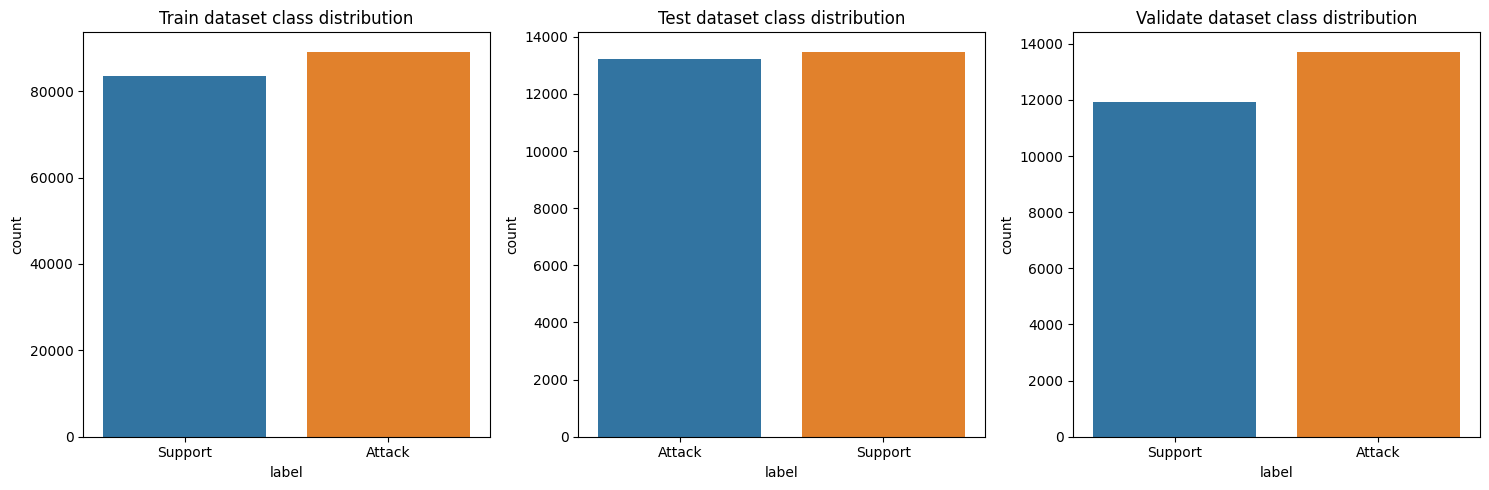

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df = df_kialo_new

# Separate into train, test and validate
train_df = df[df['mode'] == 'train']
test_df = df[df['mode'] == 'test']
validate_df = df[df['mode'] == 'validate']

# Check the size of each dataset
print('Train size:', len(train_df))
print('Test size:', len(test_df))
print('Validate size:', len(validate_df))

# Check the percentage of each dataset
total = len(df)
print('Train percentage:', len(train_df)/total)
print('Test percentage:', len(test_df)/total)
print('Validate percentage:', len(validate_df)/total)

# Check for imbalances in the classes
print('Train dataset class distribution:\n', train_df['label'].value_counts())
print('Test dataset class distribution:\n', test_df['label'].value_counts())
print('Validate dataset class distribution:\n', validate_df['label'].value_counts())

# Plotting the class distributions
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(data=train_df, x='label')
plt.title('Train dataset class distribution')

plt.subplot(1,3,2)
sns.countplot(data=test_df, x='label')
plt.title('Test dataset class distribution')

plt.subplot(1,3,3)
sns.countplot(data=validate_df, x='label')
plt.title('Validate dataset class distribution')

# Adjust margins
plt.subplots_adjust(wspace=0.5)

# Save the figure
plt.savefig('kialo_data_set_plot.png')

plt.tight_layout()
plt.show()


Train size: 289
Test size: 49
Validate size: 47
Train percentage: 0.7506493506493507
Test percentage: 0.12727272727272726
Validate percentage: 0.12207792207792208
Train dataset class distribution:
 label
Support    211
Attack      78
Name: count, dtype: int64
Test dataset class distribution:
 label
Support    34
Attack     15
Name: count, dtype: int64
Validate dataset class distribution:
 label
Support    32
Attack     15
Name: count, dtype: int64


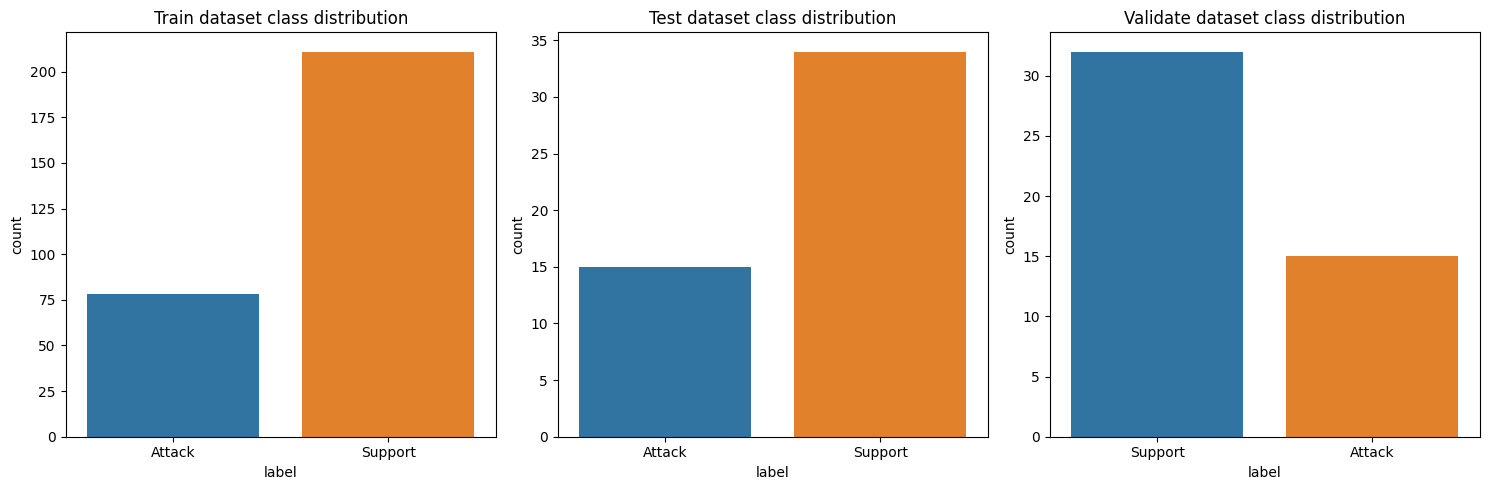

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df = pd.read_pickle("./data/microtext_references.pickle")
df = df[df['label'] != 'Support: Example']

# Separate into train, test and validate
train_df = df[df['mode'] == 'train']
test_df = df[df['mode'] == 'test']
validate_df = df[df['mode'] == 'validate']

# Check the size of each dataset
print('Train size:', len(train_df))
print('Test size:', len(test_df))
print('Validate size:', len(validate_df))

# Check the percentage of each dataset
total = len(df)
print('Train percentage:', len(train_df)/total)
print('Test percentage:', len(test_df)/total)
print('Validate percentage:', len(validate_df)/total)

# Check for imbalances in the classes
print('Train dataset class distribution:\n', train_df['label'].value_counts())
print('Test dataset class distribution:\n', test_df['label'].value_counts())
print('Validate dataset class distribution:\n', validate_df['label'].value_counts())

# Plotting the class distributions
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(data=train_df, x='label')
plt.title('Train dataset class distribution')

plt.subplot(1,3,2)
sns.countplot(data=test_df, x='label')
plt.title('Test dataset class distribution')

plt.subplot(1,3,3)
sns.countplot(data=validate_df, x='label')
plt.title('Validate dataset class distribution')

# Adjust margins
plt.subplots_adjust(wspace=0.5)

# Save the figure
plt.savefig('kialo_data_set_plot.png')

plt.tight_layout()
plt.show()
